<a href="https://colab.research.google.com/github/Subramaniya-pillai/mnist-classification-ex-03-DL/blob/main/DL_Ex_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
     

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

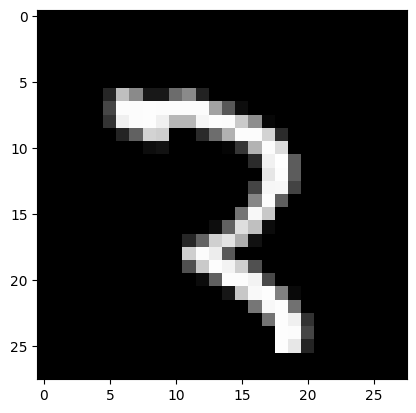

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]


5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:

type(y_train_onehot)

numpy.ndarray

In [ ]:

y_train_onehot.shape

(60000, 10)

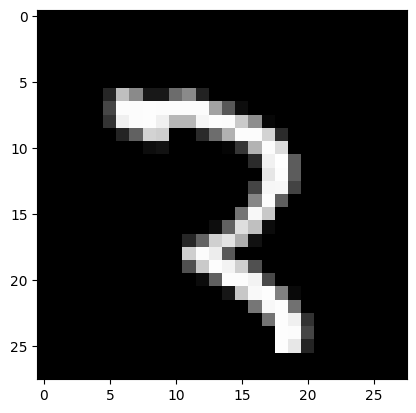

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu')) 
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (16, activation='relu'))
model.add (layers.Dense (8, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                173088    
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 32s 33ms/step - loss: 0.5223 - accuracy: 0.8498 - val_loss: 0.1893 - val_accuracy: 0.9473
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.1540 - accuracy: 0.9582 - val_loss: 0.1105 - val_accuracy: 0.9681
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0985 - accuracy: 0.9717 - val_loss: 0.0951 - val_accuracy: 0.9710
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0746 - accuracy: 0.9787 - val_loss: 0.0773 - val_accuracy: 0.9776
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0598 - accuracy: 0.9825 - val_loss: 0.0684 - val_accuracy: 0.9785


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.522263,0.849767,0.189290,0.9473
1,0.154003,0.958250,0.110505,0.9681
2,0.098479,0.971667,0.095053,0.9710
3,0.074572,0.978750,0.077281,0.9776
4,0.059751,0.982517,0.068407,0.9785


<Axes: >

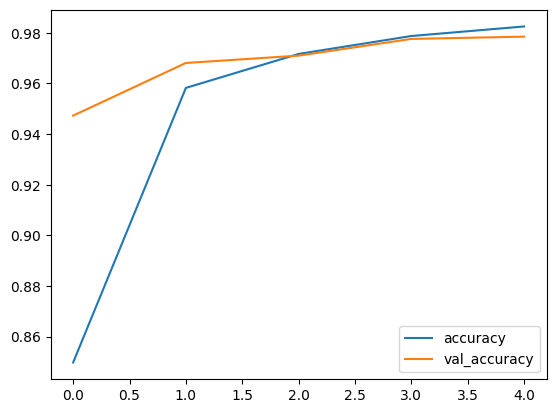

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

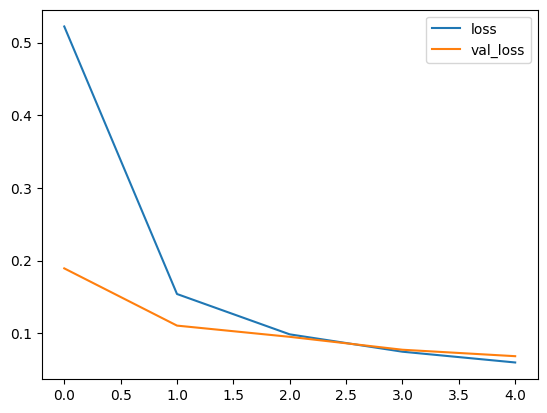

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 10ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 963    0    2    0    2    5    1    1    1    5]
 [   0 1125    2    0    2    1    3    0    2    0]
 [   4    3 1008    2    4    0    1    4    4    2]
 [   0    0    4  981    0   15    0    1    6    3]
 [   2    1    2    0  969    0    0    0    2    6]
 [   1    0    0    3    0  887    0    0    0    1]
 [  10    3    0    0    1   22  918    0    4    0]
 [   0    1   16    0    0    0    0 1000    3    8]
 [   2    0    0    1    3    4    0    2  957    5]
 [   3    0    1    1   10    7    0    4    6  977]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.94      0.99      0.97       892
           6       0.99      0.96      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('test.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('test.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 61ms/step


In [ ]:
print(x_single_prediction)

[3]


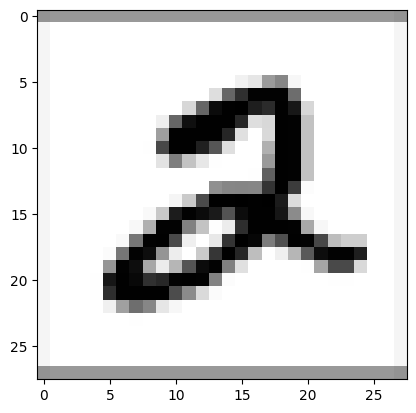

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [ ]:


x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
     

1/1 [==============================] - 0s 78ms/step


In [ ]:

print(x_single_prediction)  

[2]
